# **Link to Unique's Group Video Presentation: [Team Unique's Final Video Presentation](https://drive.google.com/file/d/1PpEB-i-F6qc9KZplpfEW5aZa3wXIekXN/view?usp=sharing)**
# Final Capstone Project - IDC 6210 (Machine Learning for Data Science)
# UWF Spring 2024
# Team Name: Unique
# Group Member Names:
- Stacy Chandisingh (Group Leader)
- Josh Hollandsworth
- Michael Ho

In [ ]:
 !pip install pyspark
 from pyspark.sql import SparkSession
 # Create a Spark session
 sc = SparkSession.builder.master("local[*]").appName("Test").getOrCreate().sparkContext

In [ ]:
# Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder



In [ ]:
# Set random seed to be able to get similar results
np.random.seed(1)

In [ ]:
# Allow google colab to access project csv files from my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create a file path and load the customer training data
file_path = '/content/drive/My Drive/Final Capstone Project/uwf-customer-churn-prediction/train.csv'
train_df = pd.read_csv(file_path)

In [ ]:
# Preview dataframe
train_df.head(10)

,id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,label
0,1815,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,0
1,5947,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,1
2,3882,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,0
3,2390,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,0
4,3677,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,0
5,612,Female,0,Yes,Yes,9,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,No,Mailed check,65.00,663.05,1
6,589,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,Two year,Yes,Electronic check,99.15,7422.1,0
7,2688,Male,0,No,No,28,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,No,Electronic check,91.00,2626.15,0
8,1551,Male,1,Yes,No,6,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.80,457.1,0
9,2891,Female,1,Yes,Yes,47,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.55,3309.25,1


In [ ]:
# Show datatypes for columns in dataframe
viz_df = train_df.convert_dtypes()

print('\nThe columns in the file are as follows')
for col in viz_df:
    print(f'{col} - {viz_df[col].dtype}')



The columns in the file are as follows
id - Int64
gender - string
senior_citizen - Int64
partner - string
dependents - string
tenure - Int64
phone_service - string
multiple_lines - string
internet_service - string
online_security - string
online_backup - string
device_protection - string
tech_support - string
streaming_tv - string
streaming_movies - string
contract - string
paperless_billing - string
payment_method - string
monthly_charges - Float64
total_charges - string
label - Int64


In [ ]:
# total_charges is a string but really should be a float, find out what are bad values

def is_number(n):
    try:
        float(n)   # Type-casting the string to `float`.
                   # If string is not a valid `float`,
                   # it'll raise `ValueError` exception
    except ValueError:
        return False
    return True

for val in viz_df['total_charges']:
  s = str(val)
  if not is_number(s):
    print(f'{val} is not a number')

  is not a number
  is not a number
  is not a number
  is not a number
  is not a number
  is not a number
  is not a number
  is not a number


In [ ]:
# total charges has some empty strings, coerce them to na's

viz_df['total_charges'] = pd.to_numeric(viz_df['total_charges'], errors='coerce')
viz_df['total_charges'] = viz_df['total_charges'].astype('float64')

In [ ]:
# senior citizen is a bit flag, for consistency for now, set it to 1 = 'yes', 0 = 'no'

viz_df['senior_citizen'] = viz_df['senior_citizen'].map({0: 'No', 1: 'Yes'})
viz_df['senior_citizen'] = viz_df['senior_citizen'].astype('string')

viz_df.head(10)


,id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,label
0,1815,Male,No,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.7,258.35,0
1,5947,Female,No,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.9,3160.55,1
2,3882,Male,No,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,0
3,2390,Male,No,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,0
4,3677,Male,No,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.4,2044.75,0
5,612,Female,No,Yes,Yes,9,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,No,Mailed check,65.0,663.05,1
6,589,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,Two year,Yes,Electronic check,99.15,7422.10,0
7,2688,Male,No,No,No,28,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,No,Electronic check,91.0,2626.15,0
8,1551,Male,Yes,Yes,No,6,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.8,457.10,0
9,2891,Female,Yes,Yes,Yes,47,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.55,3309.25,1


In [ ]:
viz_df['label'] = viz_df['label'].map({0: 'Current', 1: 'Churned'})
viz_df.head()


,id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,label
0,1815,Male,No,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.7,258.35,Current
1,5947,Female,No,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.9,3160.55,Churned
2,3882,Male,No,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,Current
3,2390,Male,No,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,Current
4,3677,Male,No,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.4,2044.75,Current


In [ ]:
print('\nThe columns in the file are as follows')
for col in viz_df:
    print(f'{col} - {viz_df[col].dtype}')


The columns in the file are as follows
id - Int64
gender - string
senior_citizen - string
partner - string
dependents - string
tenure - Int64
phone_service - string
multiple_lines - string
internet_service - string
online_security - string
online_backup - string
device_protection - string
tech_support - string
streaming_tv - string
streaming_movies - string
contract - string
paperless_billing - string
payment_method - string
monthly_charges - Float64
total_charges - float64
label - object


## Data Visualization


<Figure size 640x480 with 0 Axes>

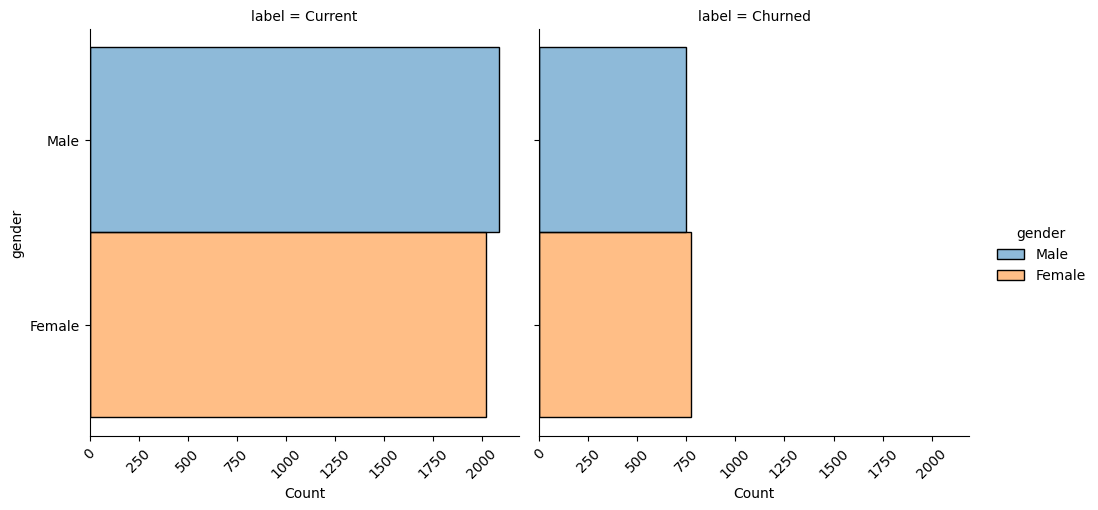

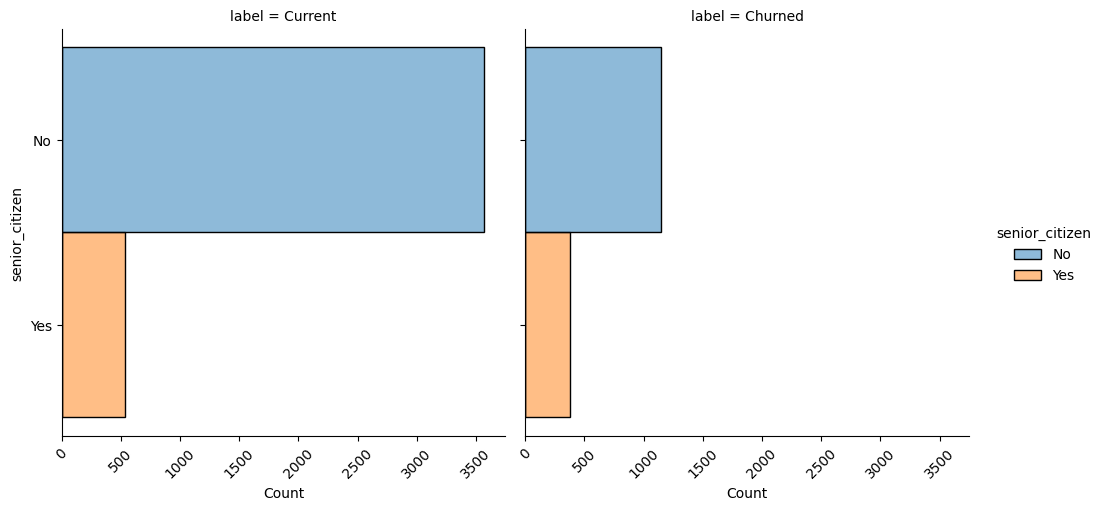

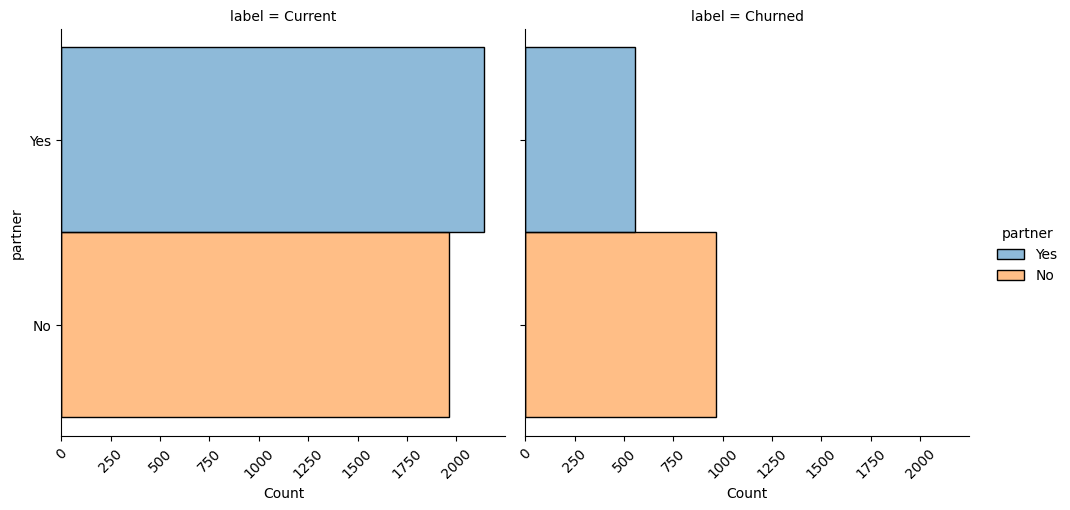

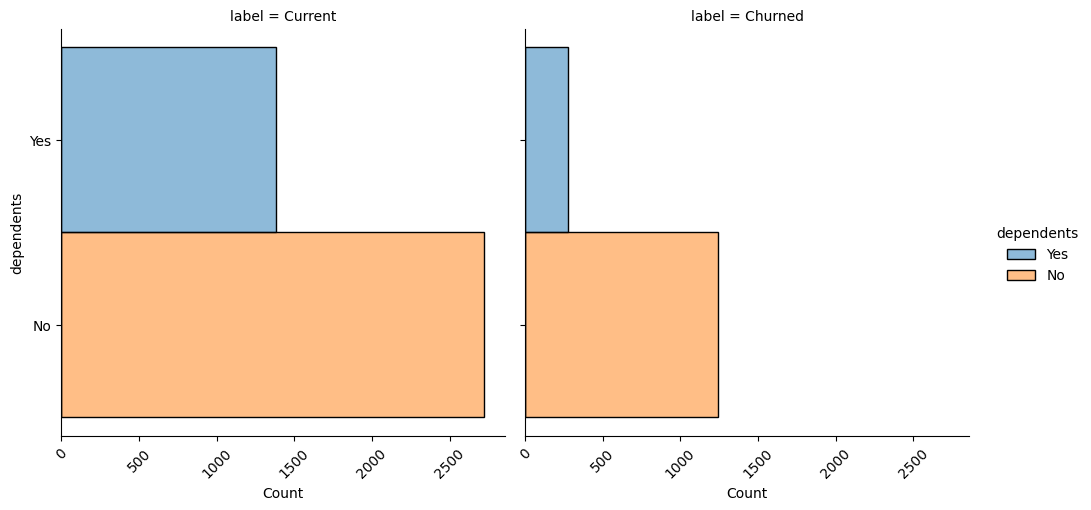

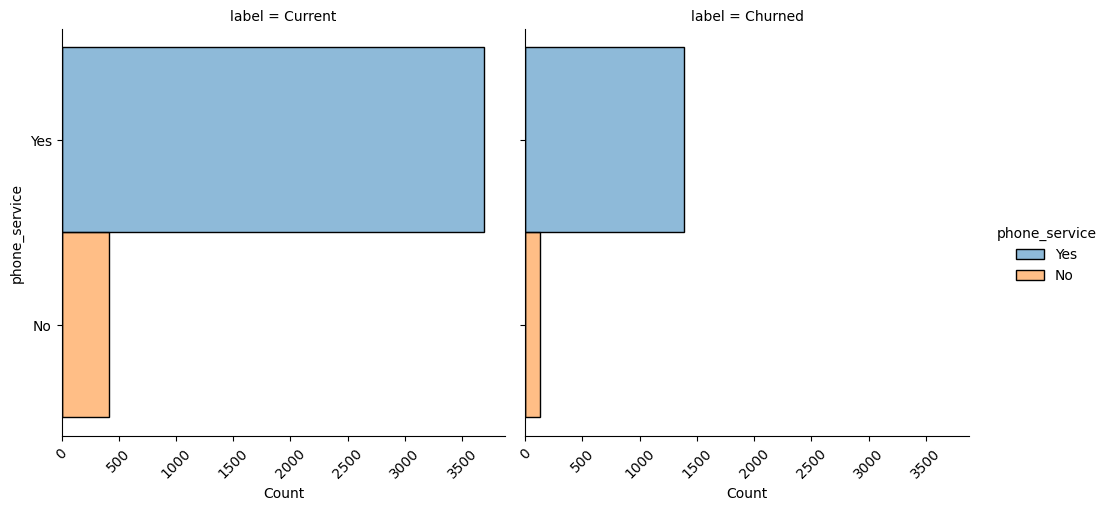

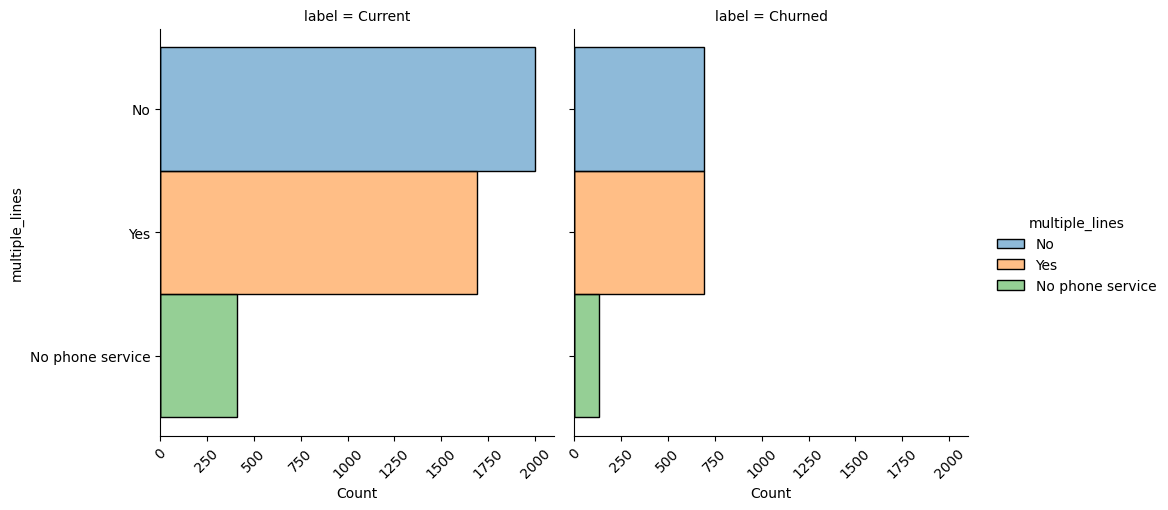

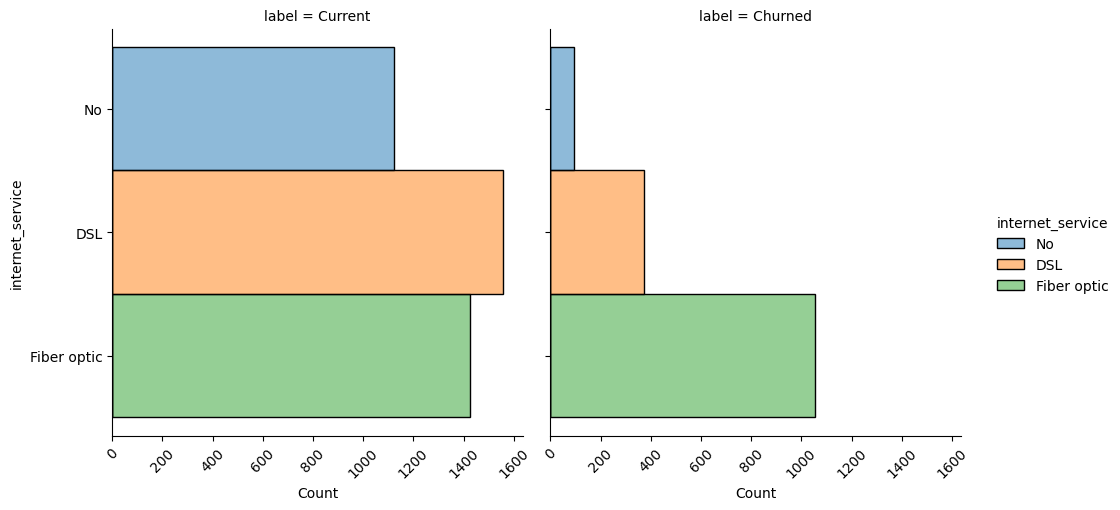

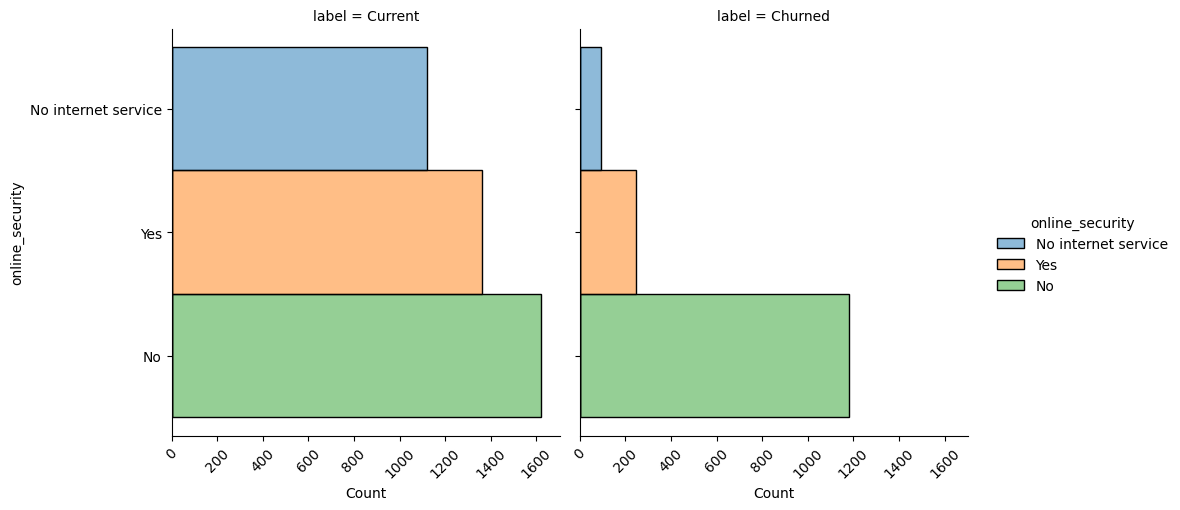

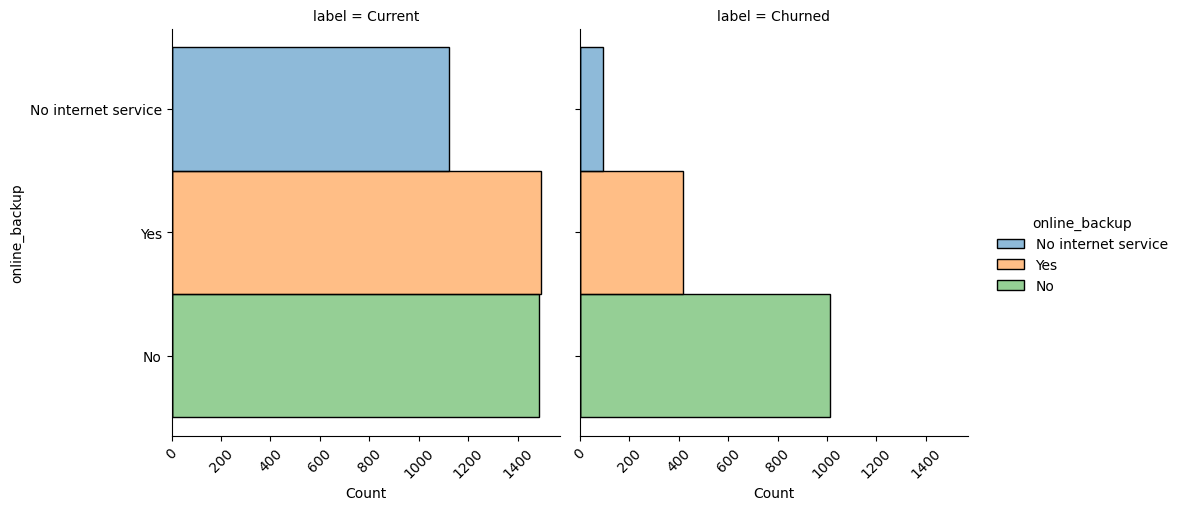

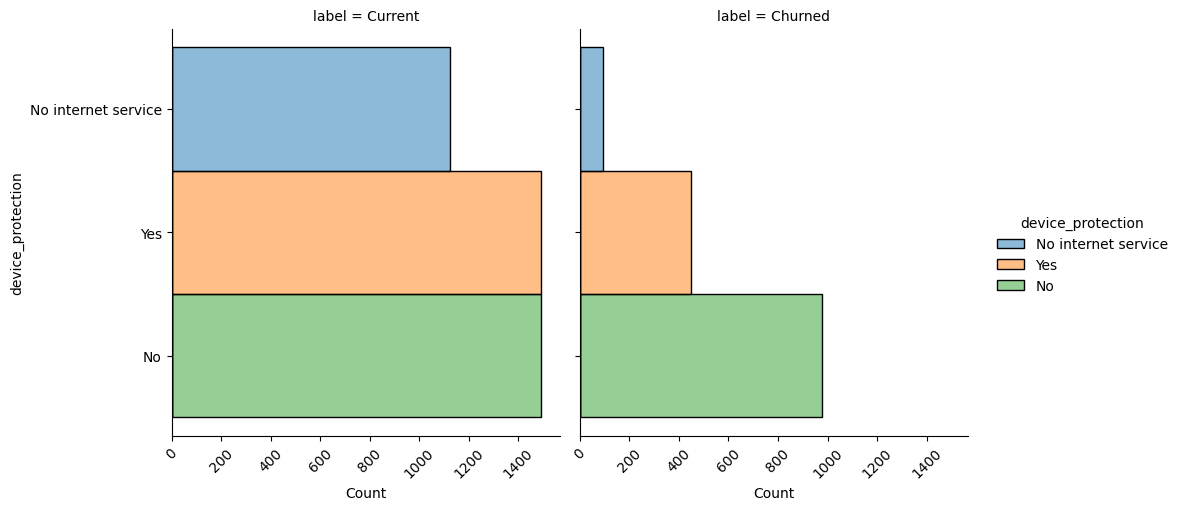

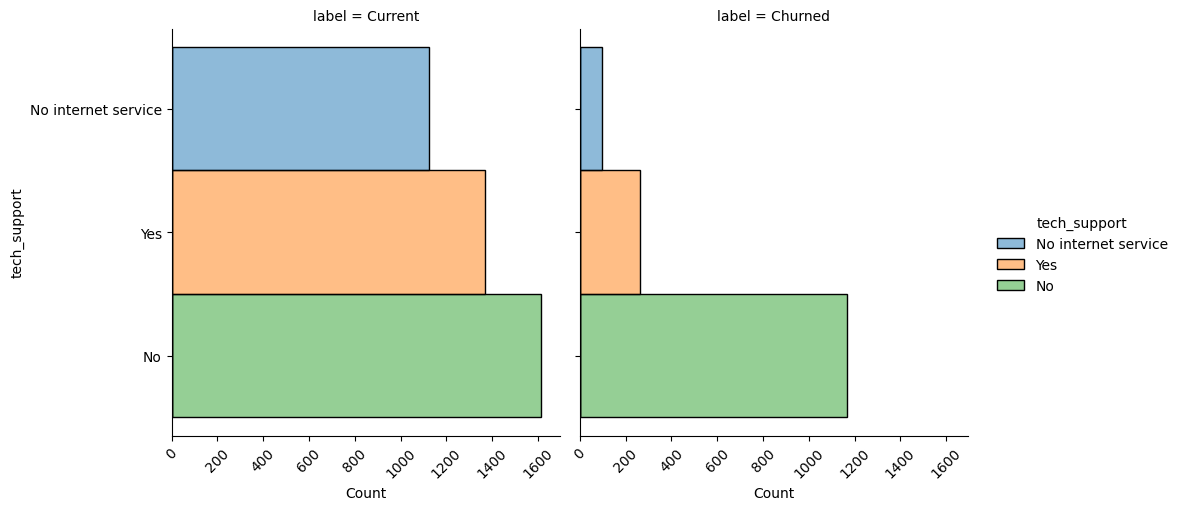

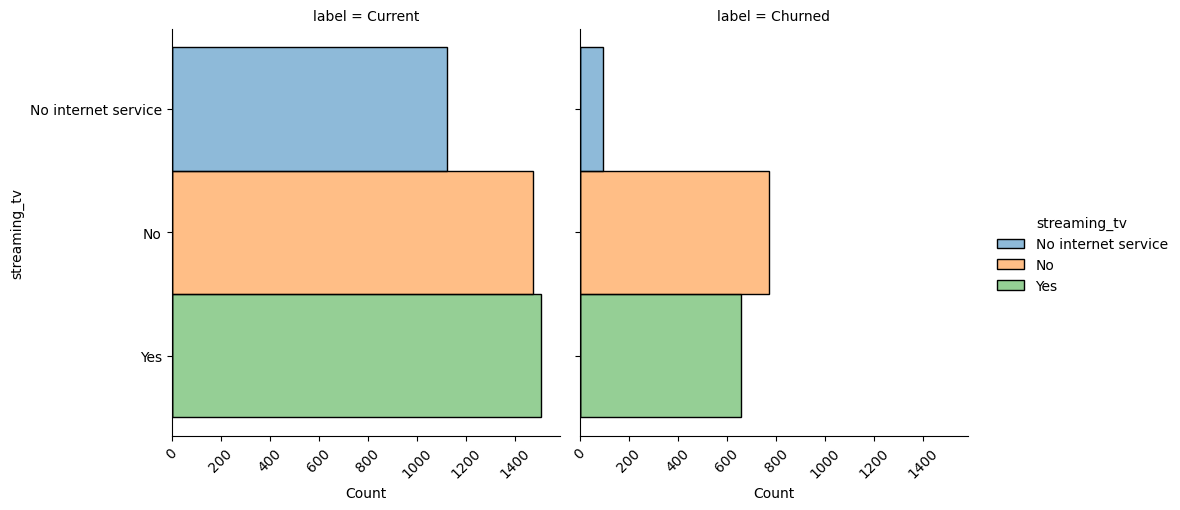

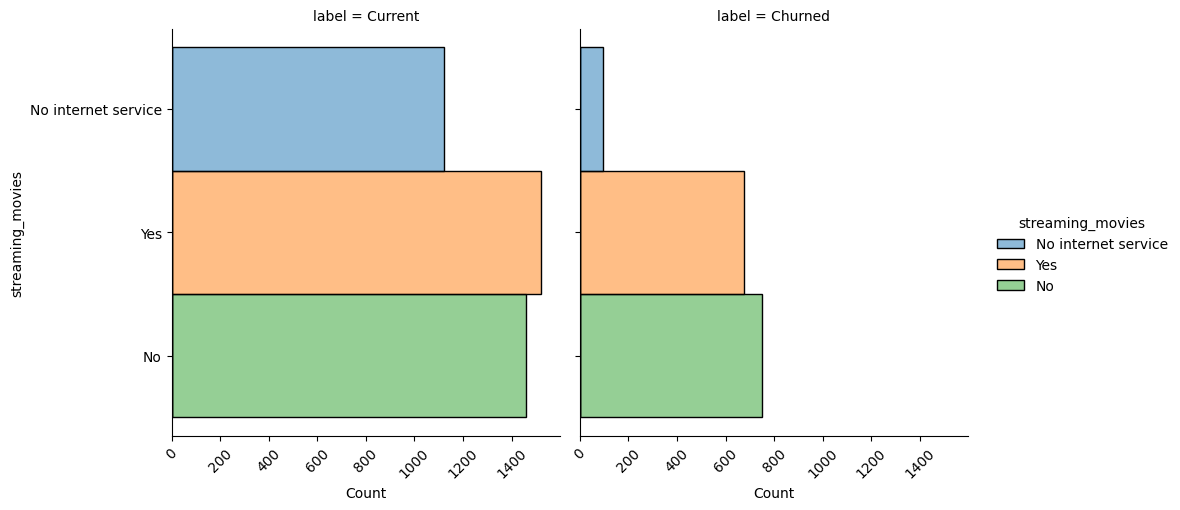

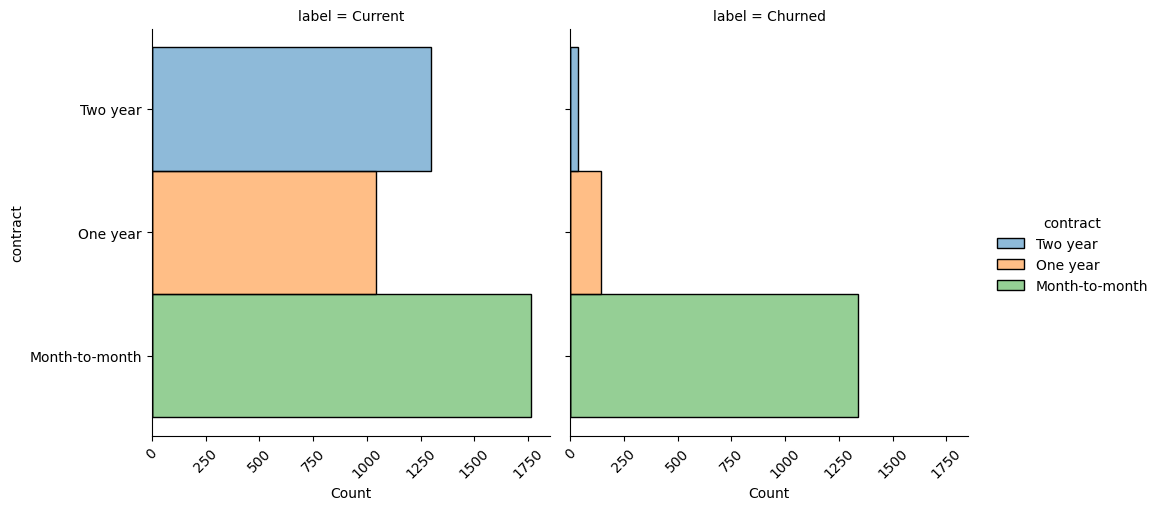

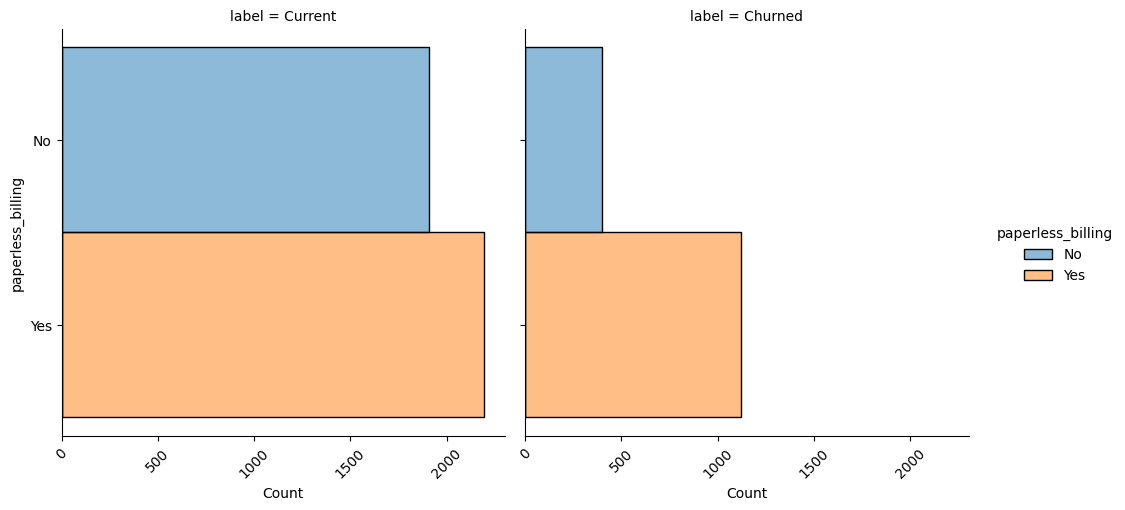

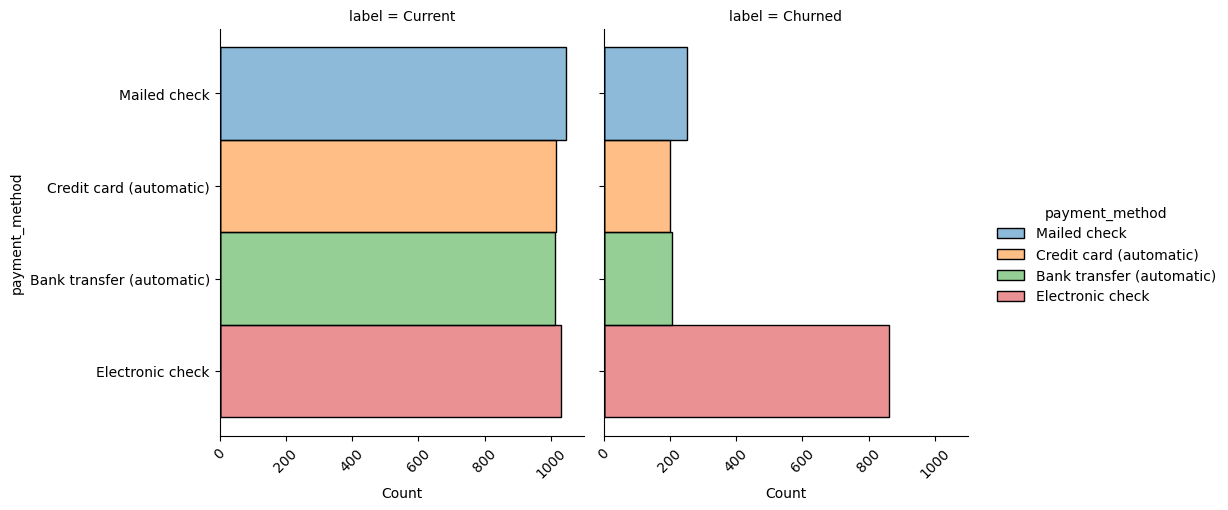

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots_adjust(hspace = 0.8)
for col_name in viz_df.select_dtypes(include=['string']).columns:

    # make the plot separated by index
    ax = sns.displot(data=viz_df, y=col_name, col='label', hue=col_name)

    # rotate x labels 45 degrees so they're easier to read
    ax.tick_params(axis='x', labelrotation=45)

    # show the blot
    plt.show()
    print()

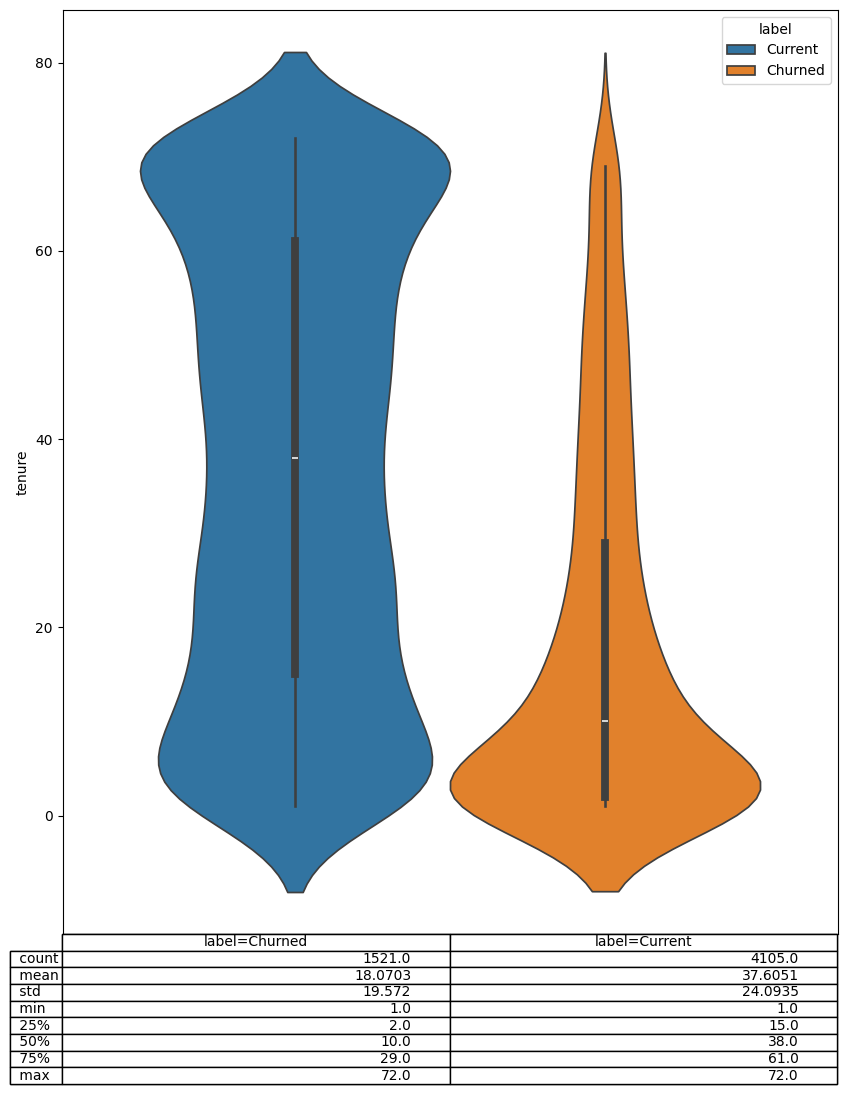

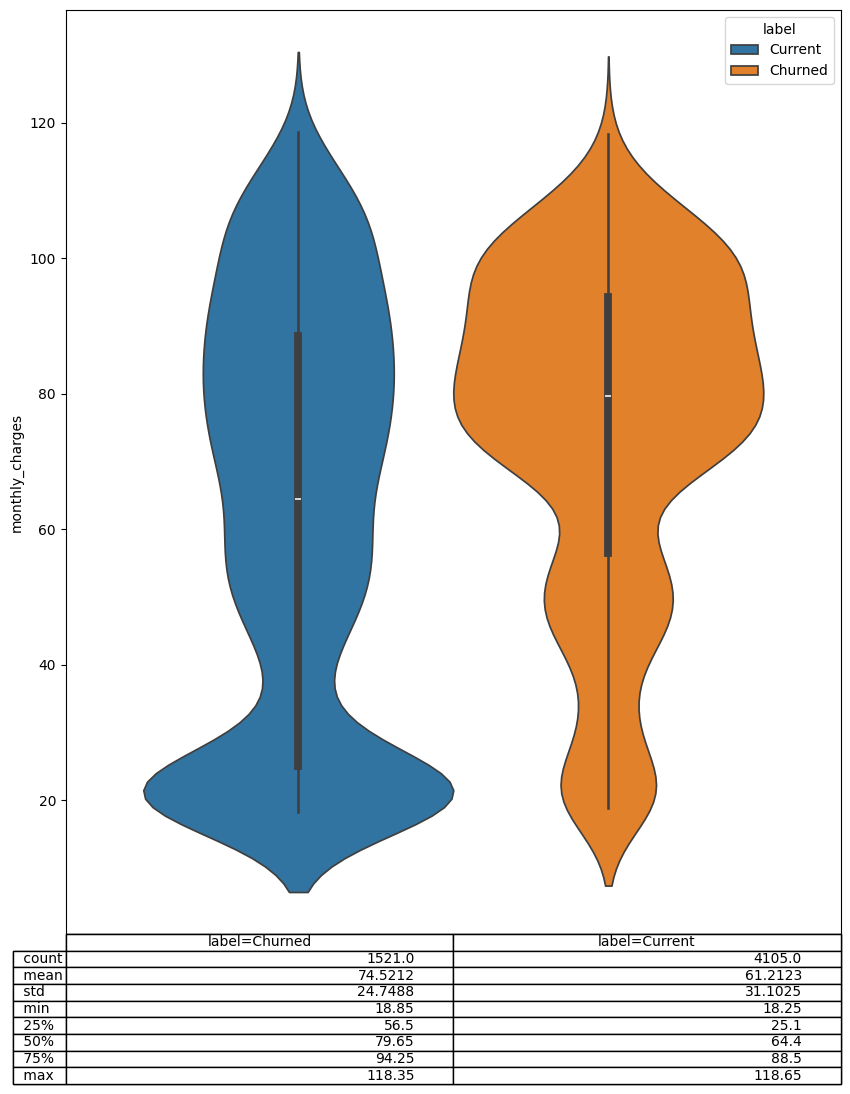

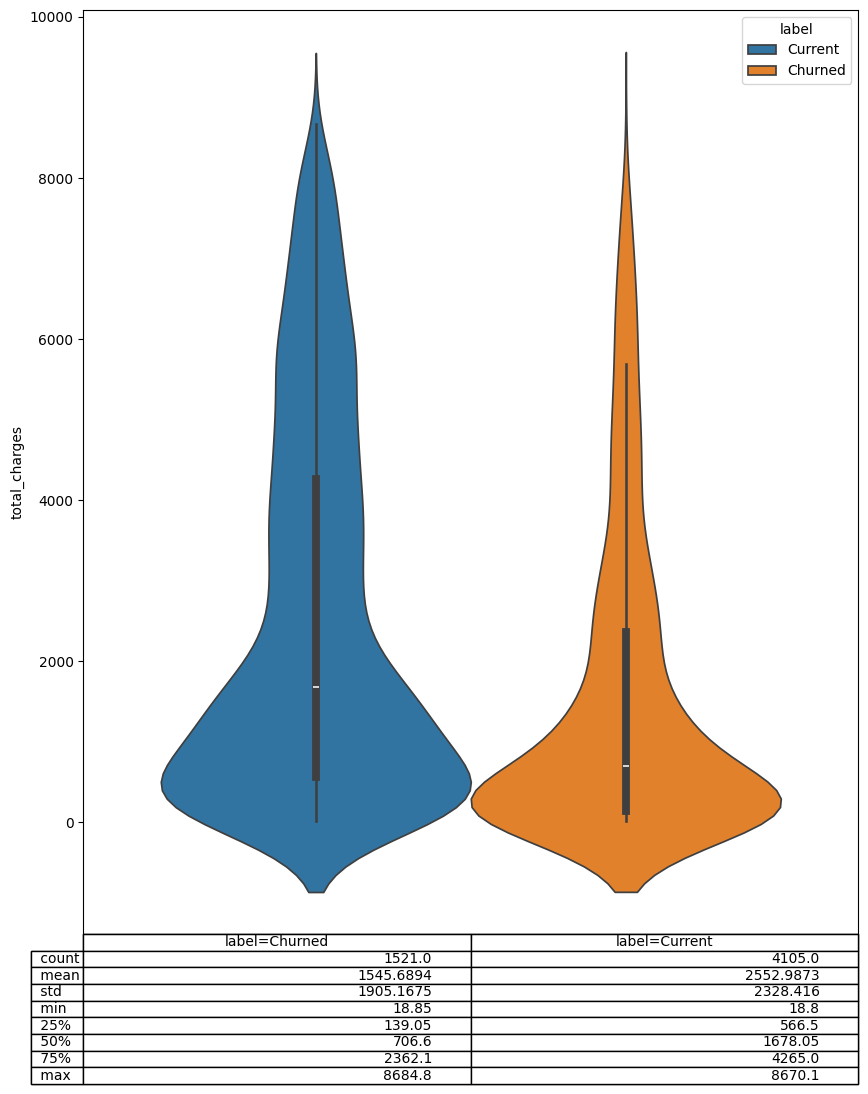

In [ ]:
# Show numeric values

# helper function for table display, removes the index formatting added by matplotlib
def remove_index_format(label):
    return label[1:len(label)-1].replace("'","").split(",")[1]

# for every column name where the type of data in the column is not a string
for col_name in viz_df.select_dtypes(exclude=['string']).columns:

    # dont plot income, just skip that field as we use it for showing
    # how numeric values split based on income
    if str(col_name) == 'label':
      continue

    # dont plot the id column
    if str(col_name) == 'id':
      continue

    # set plot size
    plt.figure(figsize=(10,12))

    # build a violin plot for the column
    ax = sns.violinplot(data=viz_df, y=col_name, hue='label')

    # build a table for stats, transpose because we want descriptions as rows not columns
    stats = viz_df[[col_name, 'label']].groupby('label').describe().transpose()


    # round the values for each cells text
    cells = [np.round(val, decimals=4) for val in stats.reset_index(drop=True).values.tolist()]

    # name the rows the stat label
    row_labels = [remove_index_format(str(label)) for label in stats.index]

    #construct a table for the statistics
    col_labels = [ f'label={col}' for col in stats.columns]

    # build a table from the constituent parts
    table = plt.table(cellText=cells, rowLabels=row_labels, colLabels=col_labels)

    # slap that table onto the plot
    ax.add_table(table)

    # show the plot
    plt.show()

    #force spacing between plots
    print()

# Preprocess dataframe so we can run it through a classifier

In [ ]:
# Check for NAs in the entire DataFrame
print(train_df.isnull().values.any())

# Check for NAs in the columns
print(train_df.isnull().any())

# Check for NAs in the rows
print(train_df.isnull().any(axis=1))

# Check for null values in dataframe
na_counts = train_df.isnull().values.flatten().sum()  # Count the number of True values

# Count the number of False values
not_na_counts = train_df.size - na_counts

print("Number of True values (NAs):", na_counts)
print("Number of False values (Non-NAs):", not_na_counts)

False
id                   False
gender               False
senior_citizen       False
partner              False
dependents           False
tenure               False
phone_service        False
multiple_lines       False
internet_service     False
online_security      False
online_backup        False
device_protection    False
tech_support         False
streaming_tv         False
streaming_movies     False
contract             False
paperless_billing    False
payment_method       False
monthly_charges      False
total_charges        False
label                False
dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
5629    False
5630    False
5631    False
5632    False
5633    False
Length: 5634, dtype: bool
Number of True values (NAs): 0
Number of False values (Non-NAs): 118314


In [ ]:
# Get datatypes for train_df
data_types = train_df.dtypes

# Print the data types of each column
print(data_types)

id                     int64
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
label                  int64
dtype: object


In [ ]:
# Check summary statistics of relevant numeric data. We notice that total_charges does not appear in the summary statistics. Therefore, we will further inspect this column which shows an object datatype
summary_stats = train_df.drop(columns=['id','label','senior_citizen']).describe()

# Display the summary statistics
print(summary_stats)

            tenure  monthly_charges
count  5634.000000      5634.000000
mean     32.277955        64.779127
std      24.555211        30.104993
min       0.000000        18.250000
25%       9.000000        35.400000
50%      29.000000        70.375000
75%      55.000000        89.850000
max      72.000000       118.650000


In [ ]:
# Replace empty strings with NaN. The datatype for this column shows as object so we will work to get it in numeric form
train_df['total_charges'] = train_df['total_charges'].replace(' ', np.nan)

# Convert 'total_charges' to float
train_df['total_charges'] = train_df['total_charges'].astype(float)

In [ ]:
# Check summary statistics of relevant numeric data
summary_stats = train_df.drop(columns=['id','label','senior_citizen']).describe()

# Display the summary statistics
print(summary_stats)

            tenure  monthly_charges  total_charges
count  5634.000000      5634.000000    5626.000000
mean     32.277955        64.779127    2280.662380
std      24.555211        30.104993    2266.394623
min       0.000000        18.250000      18.800000
25%       9.000000        35.400000     391.900000
50%      29.000000        70.375000    1394.800000
75%      55.000000        89.850000    3794.487500
max      72.000000       118.650000    8684.800000


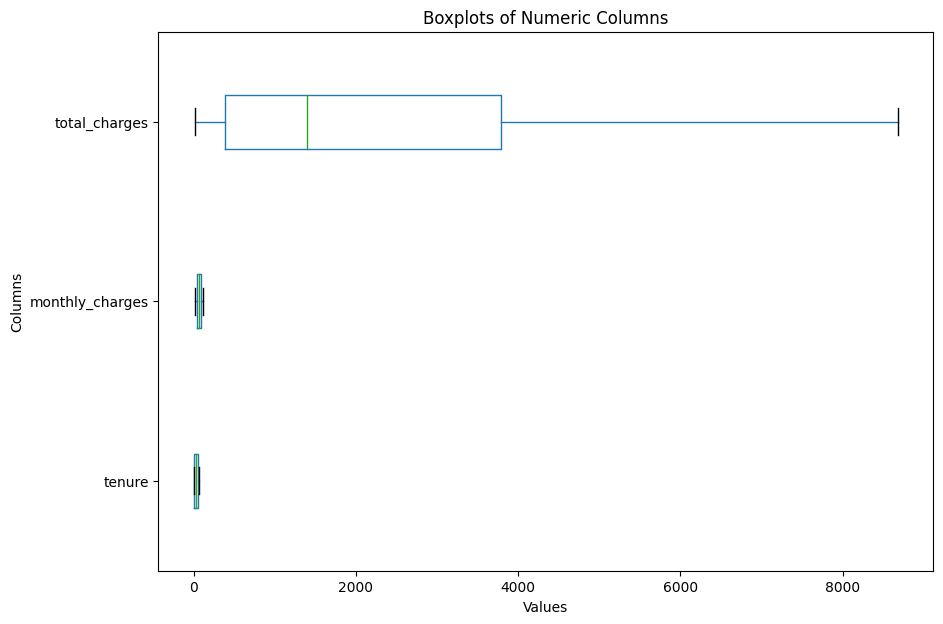

In [ ]:
# Create boxplots of numeric columns to visualize spread of data and to identify any outliers. Exclude 'id' and 'label' columns from boxplot.
numeric_columns = train_df.select_dtypes(include=['number']).drop(columns=['id', 'label', 'senior_citizen'])

# Create boxplots for numeric columns
boxplot = numeric_columns.boxplot(grid=False, vert=False, figsize=(10, 7))

# Provide title and labels
plt.title('Boxplots of Numeric Columns')
plt.xlabel('Values')
plt.ylabel('Columns')

# Show the plot
plt.show()

### Instead of dropping any rows within the total_charges column, we will use median imputation where we will replace missing values in this column with the median of the feature. We see that the maximum number is 8684.80 (from the summary statistics) and the median is much less at a value of 1394.80
  ### By using median imputation, this will help us to not skew the values of the missing data. This will provide better model results

In [ ]:
# We will impute missing values via the column median

from sklearn.impute import SimpleImputer

# Put column to impute in a new variable
column_to_impute = 'total_charges'

# Create a SimpleImputer instance
imr = SimpleImputer(strategy='median')

# Fit the imputer on the total_charges column and transform it
train_df[column_to_impute] = imr.fit_transform(train_df[[column_to_impute]])

In [ ]:
# Check that the size of the dataframe is maintained
shape2 = train_df.shape

# Print the shape of the DataFrame
print("Shape of DataFrame:", shape2)

Shape of DataFrame: (5634, 21)


In [ ]:
# Convert variables to binary responses
# Define mapping for each variable
gender_mapping = {'Male': 1, 'Female': 0}
phone_service_mapping = {'Yes': 1, 'No': 0}
paperless_billing_mapping = {'Yes': 1, 'No': 0}
partner = {'Yes': 1, 'No': 0}
dependents = {'Yes': 1, 'No': 0}

# Apply mapping using map() function
train_df['gender'] = train_df['gender'].map(gender_mapping)
train_df['phone_service'] = train_df['phone_service'].map(phone_service_mapping)
train_df['paperless_billing'] = train_df['paperless_billing'].map(paperless_billing_mapping)
train_df['partner'] = train_df['partner'].map(partner)
train_df['dependents'] = train_df['dependents'].map(dependents)

# Preview dataframe
train_df.head(10)

,id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,label
0,1815,1,0,1,1,12,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.70,258.35,0
1,5947,0,0,0,0,42,1,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,0,Credit card (automatic),73.90,3160.55,1
2,3882,1,0,1,0,71,1,Yes,DSL,Yes,...,No,Yes,No,No,Two year,0,Bank transfer (automatic),65.15,4681.75,0
3,2390,1,0,1,1,71,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,0,Electronic check,85.45,6300.85,0
4,3677,1,0,0,0,30,1,No,DSL,Yes,...,No,Yes,Yes,No,One year,0,Electronic check,70.40,2044.75,0
5,612,0,0,1,1,9,1,No,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,0,Mailed check,65.00,663.05,1
6,589,1,0,1,0,72,1,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,Two year,1,Electronic check,99.15,7422.10,0
7,2688,1,0,0,0,28,1,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,0,Electronic check,91.00,2626.15,0
8,1551,1,1,1,0,6,1,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,80.80,457.10,0
9,2891,0,1,1,1,47,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,0,Bank transfer (automatic),70.55,3309.25,1


In [ ]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
encoded_columns = encoder.fit_transform(train_df[['multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'payment_method']])

# Put encoded columns back into train_df
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'payment_method']))

# Concatenate the encoded dataframe with the original dataframe, dropping the original categorical columns
train_df = pd.concat([train_df.drop(columns=['multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'payment_method']), encoded_df], axis=1)

# Preview dataframe
train_df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,1815,1,0,1,1,12,1,0,19.70,258.35,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,5947,0,0,0,0,42,1,0,73.90,3160.55,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,3882,1,0,1,0,71,1,0,65.15,4681.75,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2390,1,0,1,1,71,1,0,85.45,6300.85,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,3677,1,0,0,0,30,1,0,70.40,2044.75,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,612,0,0,1,1,9,1,0,65.00,663.05,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,589,1,0,1,0,72,1,1,99.15,7422.10,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,2688,1,0,0,0,28,1,0,91.00,2626.15,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,1551,1,1,1,0,6,1,1,80.80,457.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2891,0,1,1,1,47,1,0,70.55,3309.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split training dataset into training set and test set.
## Then, standardize the dataframe

In [ ]:
# Separate the Features (X) from the Target (y)
y = train_df["label"]
X = train_df.drop(columns=["label", "id"])

In [ ]:
# Split the dataset. Note: already performed import in first code block: "from sklearn.model_selection import train_test_split"
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1, stratify=y)

In [ ]:
# Assess how the data has been split
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [4113 1521]
Labels counts in y_train: [3701 1369]
Labels counts in y_test: [412 152]


In [ ]:
# Get the data types of all columns
column_datatypes = train_df.dtypes

print(column_datatypes)

id                                          int64
gender                                      int64
senior_citizen                              int64
partner                                     int64
dependents                                  int64
tenure                                      int64
phone_service                               int64
paperless_billing                           int64
monthly_charges                           float64
total_charges                             float64
label                                       int64
multiple_lines_No phone service           float64
multiple_lines_Yes                        float64
internet_service_Fiber optic              float64
internet_service_No                       float64
online_security_No internet service       float64
online_security_Yes                       float64
online_backup_No internet service         float64
online_backup_Yes                         float64
device_protection_No internet service     float64


In [ ]:
# We will now standardize the features here
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Train the Logistic Regression Model

In [ ]:
# Next, we will explore the Logistic Regression classifier
lr = LogisticRegression(C=0.01, solver='lbfgs', multi_class='ovr', max_iter=30, random_state=42)
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.01, max_iter=30, multi_class='ovr', random_state=42)

In [ ]:
# Show the number of misclassified examples
y_pred2 = lr.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred2).sum())

Misclassified examples: 131


In [ ]:
# Check the accuracy score.
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred2))

Accuracy: 0.768


In [ ]:
# Document and evaluate the Logistic Regression model's performance
print('Accuracy: %.3f' % lr.score(X_test_std, y_test))

Accuracy: 0.768


In [ ]:
# Although we have the accuracy score above, we will be using the AUC-ROC score as our indicator of a good performing model.
# The current benchmark for this competition is an AUC-ROC score: 0.66115
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get AUC-ROC Score
roc_auc1 = roc_auc_score(y_test, y_pred2)

print('AUC-ROC Score: %.3f' % roc_auc_score(y_test, y_pred2))



AUC-ROC Score: 0.681


# Train SVM Classifier

In [ ]:
# Next, we evaluate the dataset using the SVM classifier
svm = SVC(kernel='linear', C=0.1, random_state=30)
svm.fit(X_train_std, y_train)

SVC(C=0.1, kernel='linear', random_state=30)

In [ ]:
# Show the number of misclassified examples
y_pred3 = svm.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred3).sum())

Misclassified examples: 129


In [ ]:
# Check the accuracy score.
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred3))

Accuracy: 0.771


In [ ]:
# Next, we document and evaluate the SVM model's performance
print('Accuracy: %.3f' % svm.score(X_test_std, y_test))

Accuracy: 0.771


In [ ]:
# Similarly to Logistic Regression and the remaining models, we produce the AUC-ROC Score as our indicator
roc_auc2 = roc_auc_score(y_test, y_pred3)

print('AUC-ROC Score: %.3f' % roc_auc_score(y_test, y_pred3))

AUC-ROC Score: 0.690


# Train KNN Classifier

In [ ]:
# We continue our evaluation with the KNN classifier
knn = KNeighborsClassifier(n_neighbors=6,
                           p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# Show the number of misclassified examples
y_pred4 = knn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred4).sum())

Misclassified examples: 144


In [ ]:
# Check the accuracy score.
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred4))

Accuracy: 0.745


In [ ]:
# Document and evaluate KNN's performance
print('Accuracy: %.3f' % knn.score(X_test_std, y_test))

Accuracy: 0.745


In [ ]:
# Get AUC-ROC Score for KNN
roc_auc3 = roc_auc_score(y_test, y_pred4)

print('AUC-ROC Score: %.3f' % roc_auc_score(y_test, y_pred4))

AUC-ROC Score: 0.626


# Train Decision Trees Classifier

In [ ]:
# Next, we explore Decision Trees
#dt = DecisionTreeClassifier()
dt = DecisionTreeClassifier(criterion='gini',
                                    max_depth=2,
                                    random_state=2)
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [ ]:
# Show the number of misclassified examples
y_pred5 = dt.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred5).sum())

Misclassified examples: 136


In [ ]:
# Check the accuracy score.
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred5))

Accuracy: 0.759


In [ ]:
# Document and evaluate the Decision Tree model's performance
print('Accuracy: %.3f' % dt.score(X_test_std, y_test))

Accuracy: 0.759


In [ ]:
# Get AUC-ROC Score
roc_auc4 = roc_auc_score(y_test, y_pred5)

print('AUC-ROC Score: %.3f' % roc_auc_score(y_test, y_pred5))

AUC-ROC Score: 0.632


# Train Random Forest Classifier

In [ ]:
# Lastly, we evaluate the dataset with Random Forest
#rf = RandomForestClassifier()
rf = RandomForestClassifier(n_estimators=1000,
                                random_state=20,
                                n_jobs=2)
rf.fit(X_train_std, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=2, random_state=20)

In [ ]:
# Show the number of misclassified examples
y_pred6 = rf.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred6).sum())

Misclassified examples: 133


In [ ]:
# Check the accuracy score.
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred6))

Accuracy: 0.764


In [ ]:
# Document and evaluate the Random Forest model's performance
print('Accuracy: %.3f' % rf.score(X_test_std, y_test))

Accuracy: 0.764


In [ ]:
# Get AUC-ROC Score
roc_auc5 = roc_auc_score(y_test, y_pred6)

print('AUC-ROC Score: %.3f' % roc_auc_score(y_test, y_pred6))

AUC-ROC Score: 0.673


# Use test.csv file to create the submission.csv file for Kaggle. We preprocessed the test.csv file the same way we preprocessed the train.csv file (seen in code above).

# Clearly mention your chosen classifier for the final Kaggle submission
## Our chosen classifier for the final Kaggle submission is the SVM classifier  with an AUC-ROC Score of 69% in our notebook.

## On Kaggle, we (Unique) have a AUC-ROC score of 72.7% (73%).

### We used various hyperparameter tuning methods for the different models each yielding AUC-ROC scores that were comparably close to each other. However, the highest AUC-ROC score was seen in the SVM model (our model of choice).


In [ ]:
# Use the test.csv file for testing
# Load the test dataset (without target label)
file_path2 = '/content/drive/My Drive/Final Capstone Project/uwf-customer-churn-prediction/test.csv'
test_df = pd.read_csv(file_path2)

# Preview test_df
test_df.head(10)

,id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,3382,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,6181,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,4830,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,3738,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,4250,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05
5,6836,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),88.40,5798.3
6,3870,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.7
7,3944,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.00,44
8,3492,Male,0,Yes,No,44,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45
9,6848,Female,0,Yes,Yes,18,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.8


In [ ]:
# Check for NAs in the entire DataFrame
print(test_df.isnull().values.any())

# Check for NAs in the columns
print(test_df.isnull().any())

# Check for NAs in the rows
print(test_df.isnull().any(axis=1))

# Check for null values in dataframe
na_counts = test_df.isnull().values.flatten().sum()  # Count the number of True values

# Count the number of False values
not_na_counts = test_df.size - na_counts

print("Number of True values (NAs):", na_counts)
print("Number of False values (Non-NAs):", not_na_counts)

False
id                   False
gender               False
senior_citizen       False
partner              False
dependents           False
tenure               False
phone_service        False
multiple_lines       False
internet_service     False
online_security      False
online_backup        False
device_protection    False
tech_support         False
streaming_tv         False
streaming_movies     False
contract             False
paperless_billing    False
payment_method       False
monthly_charges      False
total_charges        False
dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
1404    False
1405    False
1406    False
1407    False
1408    False
Length: 1409, dtype: bool
Number of True values (NAs): 0
Number of False values (Non-NAs): 28180


In [ ]:
# Get datatypes for test_df
data_types2 = test_df.dtypes

# Print the data types of each column
print(data_types2)


id                     int64
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
dtype: object


In [ ]:
# Replace empty strings with NaN. The datatype for this column shows as object so we will work to get it in numeric form
test_df['total_charges'] = test_df['total_charges'].replace(' ', np.nan)

# Convert 'total_charges' to float
test_df['total_charges'] = test_df['total_charges'].astype(float)

In [ ]:
# Check summary statistics of relevant numeric data
summary_stats2 = test_df.drop(columns=['id','senior_citizen']).describe()

# Display the summary statistics
print(summary_stats2)

            tenure  monthly_charges  total_charges
count  1409.000000      1409.000000    1406.000000
mean     32.743790        64.691980    2293.856437
std      24.581736        30.040784    2269.054321
min       0.000000        18.700000      19.200000
25%       9.000000        36.850000     423.687500
50%      29.000000        70.150000    1413.550000
75%      56.000000        89.850000    3791.875000
max      72.000000       118.750000    8672.450000


In [ ]:
# We will impute missing values via the column median

from sklearn.impute import SimpleImputer

# Put column to impute in a new variable
column_to_impute2 = 'total_charges'

# Create a SimpleImputer instance
imr2 = SimpleImputer(strategy='median')

# Fit the imputer on the total_charges column and transform it
test_df[column_to_impute2] = imr2.fit_transform(test_df[[column_to_impute2]])

In [ ]:
# Check that the size of the dataframe is maintained
shape_check = test_df.shape

# Print the shape of the DataFrame
print("Shape of DataFrame:", shape_check)

Shape of DataFrame: (1409, 20)


In [ ]:
# Define mapping for each variable
gender_mapping = {'Male': 1, 'Female': 0}
phone_service_mapping = {'Yes': 1, 'No': 0}
paperless_billing_mapping = {'Yes': 1, 'No': 0}
partner = {'Yes': 1, 'No': 0}
dependents = {'Yes': 1, 'No': 0}

# Apply mapping using map() function
test_df['gender'] = test_df['gender'].map(gender_mapping)
test_df['phone_service'] = test_df['phone_service'].map(phone_service_mapping)
test_df['paperless_billing'] = test_df['paperless_billing'].map(paperless_billing_mapping)
test_df['partner'] = test_df['partner'].map(partner)
test_df['dependents'] = test_df['dependents'].map(dependents)

In [ ]:
# Re-initialize OneHotEncoder for this separate code block
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
encoded_columns2 = ohe.fit_transform(test_df[['multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'payment_method']])

# Put encoded columns back into train_df
encoded_df2 = pd.DataFrame(encoded_columns2, columns=ohe.get_feature_names_out(['multiple_lines', 'internet_service', 'online_security',
                                                                                    'online_backup', 'device_protection', 'tech_support',
                                                                                    'streaming_tv', 'streaming_movies', 'contract', 'payment_method']))

# Concatenate the encoded dataframe with the original dataframe, dropping the original categorical columns
test_df = pd.concat([test_df.drop(columns=['multiple_lines', 'internet_service', 'online_security',
                                           'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
                                           'streaming_movies', 'contract', 'payment_method']), encoded_df2], axis=1)

# Preview dataframe
test_df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,3382,0,0,0,0,41,1,1,79.85,3320.75,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,6181,0,1,0,0,66,1,1,102.40,6471.85,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,4830,0,0,0,0,12,1,1,45.00,524.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3738,0,0,0,0,5,1,1,50.60,249.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4250,0,0,1,1,10,1,1,65.90,660.05,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,6836,1,0,1,0,67,1,1,88.40,5798.30,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,3870,1,0,1,0,50,1,1,98.25,4858.70,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7,3944,1,1,0,0,1,1,0,44.00,44.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,3492,1,0,1,0,44,1,1,70.95,3250.45,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,6848,0,0,1,1,18,1,0,55.95,1082.80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Check size of dataframe
checksize1 = test_df.shape

print(checksize1)

(1409, 31)


In [ ]:
# Keep the ID column to create the submission.csv file
test_id_column = test_df['id']

# Remove ID column from test_df
test_df.drop(columns=['id'], inplace=True)

# Preview dataframe
test_df.head(10)

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,multiple_lines_No phone service,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,0,0,0,41,1,1,79.85,3320.75,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0,1,0,0,66,1,1,102.40,6471.85,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,0,0,0,12,1,1,45.00,524.35,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,5,1,1,50.60,249.95,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,1,10,1,1,65.90,660.05,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,1,0,1,0,67,1,1,88.40,5798.30,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1,0,1,0,50,1,1,98.25,4858.70,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7,1,1,0,0,1,1,0,44.00,44.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,0,1,0,44,1,1,70.95,3250.45,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0,0,1,1,18,1,0,55.95,1082.80,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Check size of dataframe
checksize2 = test_df.shape
print(checksize2)

(1409, 30)


In [ ]:
# We will now standardize the features here for the test dataset
#sc = StandardScaler()
X_test_scaled = sc.transform(test_df)

# Make predictions on the test data
y_pred3= svm.predict(X_test_scaled)

In [ ]:
# Now, we can add the ID column into a new dataframe with the aligned predictions.
predictions_df = pd.DataFrame({'id': test_id_column, 'label': y_pred3})

# Preview dataframe
predictions_df.head(5)

,id,label
0,3382,0
1,6181,0
2,4830,0
3,3738,0
4,4250,0


In [ ]:
# Convert predictions_df to csv format
predictions_df.to_csv('submission.csv', index=False)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Save submission.csv to Google Drive
import shutil
shutil.move("submission.csv", "/content/drive/My Drive/Final Capstone Project/uwf-customer-churn-prediction/submision.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/Final Capstone Project/uwf-customer-churn-prediction/submision.csv'